## Chap3 - Linear regression

In [1]:
import torch
import matplotlib.pyplot as plt
X = torch.Tensor(2, 3)

In [2]:
print(X)

tensor([[9.2755e-39, 1.0561e-38, 1.0286e-38],
        [8.9082e-39, 9.2756e-39, 8.4490e-39]])


In [3]:
X = torch.Tensor([[1,2,3], [4,5,6]])

In [4]:
print(X)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 기울기를 계산하는 코드

In [5]:
x = torch.tensor(data = [2.0, 3.0], requires_grad = True)
y = x**2
z = 2*y + 3

In [6]:
target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

In [7]:
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


<ipython-input-7-6c1d48845c75>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(x.grad, y.grad, z.grad)


## 선형회귀 분석모델

In [8]:
import torch #torch 라이브러리 불러옴
import torch.nn as nn # torch의 신경망 모델들을 불러옴
import torch.optim as optim # torch의 경사하강법 알고리즘을 불러옴
import torch.nn.init as init # 텐서에 초기값을 주기 위해 필요한 함수들이 있음.

In [9]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
y = 2 * x + 3
y_noise = y + noise

In [10]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()

In [11]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [12]:
label = y_noise
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    
    if i%10 == 0:
        print(loss.data)
        param_list = list(model.parameters())
        print(param_list[0].item(), param_list[1].item())

tensor(13.4403)
-0.6000712513923645 -0.2860698699951172
tensor(11.0236)
-0.10888899862766266 -0.27496981620788574
tensor(8.6448)
0.3782590627670288 -0.2611497640609741
tensor(6.3587)
0.8545244932174683 -0.24238978326320648
tensor(4.4549)
1.2840107679367065 -0.20882977545261383
tensor(3.4153)
1.5838860273361206 -0.14914976060390472
tensor(3.1366)
1.71038019657135 -0.06526975333690643
tensor(3.0143)
1.7679417133331299 0.027410253882408142
tensor(2.9094)
1.8045521974563599 0.12275026738643646
tensor(2.8087)
1.832731008529663 0.2190302163362503
tensor(2.7096)
1.8547388315200806 0.3159902095794678
tensor(2.6117)
1.8732693195343018 0.4132101833820343
tensor(2.5146)
1.8874531984329224 0.5106501579284668
tensor(2.4178)
1.9012361764907837 0.6080501079559326
tensor(2.3211)
1.915019154548645 0.7054500579833984
tensor(2.2250)
1.9294413328170776 0.8023300766944885
tensor(2.1308)
1.9428517818450928 0.8984300494194031
tensor(2.0372)
1.9564003944396973 0.9942100048065186
tensor(1.9454)
1.9669384956359

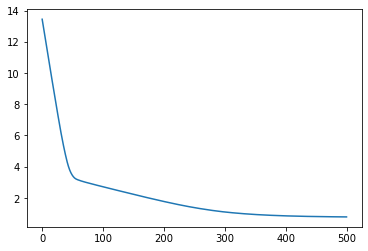

In [13]:
plt.plot(loss_array)
plt.show()